In [1]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from scipy import stats
from sklearn import linear_model
from sklearn import datasets
from sklearn import model_selection
import sklearn.linear_model
from sklearn import metrics

In [2]:
?sklearn.metrics

Type:        module
String form: <module 'sklearn.metrics' from '/home/ackerman/anaconda3/lib/python3.7/site-packages/sklearn/metrics/__init__.py'>
File:        ~/anaconda3/lib/python3.7/site-packages/sklearn/metrics/__init__.py
Docstring:  
The :mod:`sklearn.metrics` module includes score functions, performance metrics
and pairwise metrics and distance computations.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from scipy import special

$$\frac{1}{1+e^{-x}}$$

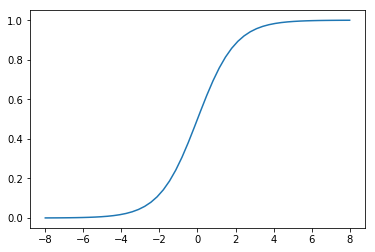

In [4]:
x = np.linspace(-8,8)
y = 1/(1+np.exp(-x))
plt.plot(x,y)

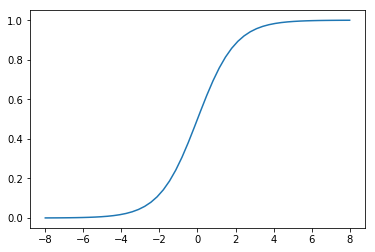

In [5]:
y = special.expit(x)
plt.plot(x,y)

In [6]:
examenes = pd.read_csv("ex2data1.txt",names=['examen1','examen2','accepted'],encoding='latin1')
examenes.describe()

,examen1,examen2,accepted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


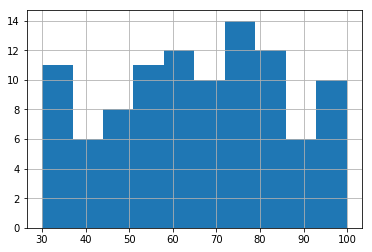

In [7]:
examenes['examen1'].hist(bins=10)

In [8]:
logistic = linear_model.LogisticRegression()

In [9]:
logistic.fit(examenes[['examen1','examen2']].values,examenes['accepted'].values)

/home/ackerman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
logistic.coef_

array([[0.03844482, 0.03101855]])

In [11]:
logistic.intercept_

array([-3.89977794])

In [12]:
pd.DataFrame({
    'color':['Azul','Verde','Verde','Rojo','Verde','Rojo']
})

,color
0,Azul
1,Verde
2,Verde
3,Rojo
4,Verde
5,Rojo


In [13]:
pd.get_dummies(_,drop_first=True)

,color_Rojo,color_Verde
0,0,0
1,0,1
2,0,1
3,1,0
4,0,1
5,1,0


In [14]:
logistic = linear_model.LogisticRegression(solver='lbfgs')

In [15]:
?linear_model.LogisticRegression

Init signature:
linear_model.LogisticRegression(
    penalty='l2',
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='warn',
    max_iter=100,
    multi_class='warn',
    verbose=0,
    warm_start=False,
    n_jobs=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the cross-
entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag' and 'lbfgs' solvers. It can handle
both dense and sparse input. Use C-ordered arrays or CSR matrices
containing 64-bit floats for optimal performance; any other input format
will be converte

In [16]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(examenes[['examen1','examen2']].values,examenes['accepted'].values,test_size=.2)

In [17]:
logistic.fit(X_train,y_train)
dict(zip(examenes.drop(['accepted'],axis=1).columns,logistic.coef_[0]))

{'examen1': 0.23183107832165786, 'examen2': 0.20426241688389646}

In [18]:
logistic.intercept_

array([-27.10558464])

In [19]:
y_predict = logistic.predict(X_test)
y_predict

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1])

In [20]:
print(y_test)

[0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1]


In [21]:
logistic.predict_proba(X_test) 

array([[9.97298582e-01, 2.70141754e-03],
       [2.26346768e-04, 9.99773653e-01],
       [9.63775735e-01, 3.62242648e-02],
       [1.27749310e-02, 9.87225069e-01],
       [1.24918883e-02, 9.87508112e-01],
       [7.33586149e-01, 2.66413851e-01],
       [7.98484052e-06, 9.99992015e-01],
       [1.39029688e-03, 9.98609703e-01],
       [3.81299976e-01, 6.18700024e-01],
       [8.94034539e-05, 9.99910597e-01],
       [9.99976848e-01, 2.31524422e-05],
       [3.87348580e-01, 6.12651420e-01],
       [8.26599356e-02, 9.17340064e-01],
       [9.62331180e-01, 3.76688197e-02],
       [1.34948182e-03, 9.98650518e-01],
       [9.96257463e-01, 3.74253709e-03],
       [8.65692639e-04, 9.99134307e-01],
       [4.80687092e-01, 5.19312908e-01],
       [4.69231582e-05, 9.99953077e-01],
       [3.81808533e-03, 9.96181915e-01]])

In [22]:
logistic.score(X_test,y_test)

0.9

In [23]:
from sklearn import metrics

In [24]:
metrics.confusion_matrix(y_test, y_predict)

array([[ 5,  1],
       [ 1, 13]])

In [25]:
metrics.f1_score(y_test, y_predict) 

0.9285714285714286

In [26]:
(2*.72)/1.72

0.8372093023255813

In [27]:
metrics.precision_score(y_test, y_predict)

0.9285714285714286

In [28]:
metrics.recall_score(y_test, y_predict)

0.9285714285714286

## Iris

In [29]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
logistic = linear_model.LogisticRegression(solver='lbfgs',)

# Para versicolor

In [31]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(iris.drop(columns=['species']).values,iris["species"]=="versicolor",test_size=.2)

In [32]:
logistic.fit(X_train,y_train)
dict(zip(iris.columns,logistic.coef_[0]))

{'sepal_length': -0.3646239058967854,
 'sepal_width': -1.8390379321167918,
 'petal_length': 0.6517993273014481,
 'petal_width': -0.9580865648791392}

In [33]:
logistic.intercept_

array([5.584656])

In [34]:
y_predict = logistic.predict(X_test)
print(y_predict)
print(len(y_predict))

[False False False  True False  True False False False  True False False
 False False False False False False False False False False False  True
 False False  True  True False False]
30


In [35]:
print(y_test)
print(len(y_test))

76      True
17     False
129    False
68      True
25     False
90      True
117    False
123    False
77      True
87      True
74      True
149    False
111    False
10     False
96      True
18     False
95      True
23     False
148    False
128    False
126    False
48     False
100    False
53      True
65      True
8      False
81      True
146    False
4      False
45     False
Name: species, dtype: bool
30


In [36]:
logistic.score(X_test,y_test)

0.7666666666666667

In [37]:
metrics.confusion_matrix(y_test, y_predict)

array([[18,  1],
       [ 6,  5]])

In [38]:
metrics.f1_score(y_test, y_predict,average='macro')

0.7127222982216143

In [39]:
metrics.precision_score(y_test, y_predict,average='macro')

0.7916666666666667

In [40]:
metrics.recall_score(y_test, y_predict,average='macro')

0.700956937799043

In [41]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

       False       0.75      0.95      0.84        19
        True       0.83      0.45      0.59        11

   micro avg       0.77      0.77      0.77        30
   macro avg       0.79      0.70      0.71        30
weighted avg       0.78      0.77      0.75        30



# Para virginica

In [42]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(iris.drop(columns=['species']).values,iris["species"]=="virginica",test_size=.2)

In [43]:
logistic.fit(X_train,y_train)
dict(zip(iris.columns,logistic.coef_[0]))

{'sepal_length': -0.2174988629321955,
 'sepal_width': -0.39574698027395355,
 'petal_length': 2.7343190270844273,
 'petal_width': 2.1539840277936997}

In [44]:
logistic.intercept_

array([-14.39582988])

In [45]:
y_predict = logistic.predict(X_test)
print(y_predict)
print(len(y_predict))

[ True False False  True False False  True False False False  True  True
 False  True  True False  True False False False False  True False  True
 False  True False False False False]
30


In [46]:
print(y_test)
print(len(y_test))

101     True
46     False
65     False
122     True
91     False
82     False
121     True
24     False
8      False
80     False
141     True
104     True
61     False
140     True
144     True
42     False
100     True
29     False
88     False
66     False
1      False
148     True
71     False
102     True
13     False
77     False
38     False
50     False
45     False
16     False
Name: species, dtype: bool
30


In [47]:
logistic.score(X_test,y_test)

0.9666666666666667

In [48]:
metrics.confusion_matrix(y_test, y_predict)

array([[19,  1],
       [ 0, 10]])

In [49]:
metrics.f1_score(y_test, y_predict,average='macro')

0.9633699633699633

In [50]:
metrics.precision_score(y_test, y_predict,average='macro')

0.9545454545454546

In [51]:
metrics.recall_score(y_test, y_predict,average='macro')

0.975

In [52]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

       False       1.00      0.95      0.97        20
        True       0.91      1.00      0.95        10

   micro avg       0.97      0.97      0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



# Para setosa

In [53]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(iris.drop(columns=['species']).values,iris["species"]=="setosa",test_size=.2)

In [54]:
logistic.fit(X_train,y_train)
dict(zip(iris.columns,logistic.coef_[0]))

{'sepal_length': -0.4332215108614866,
 'sepal_width': 0.840443440996958,
 'petal_length': -2.2174481154423984,
 'petal_width': -0.9556640750057711}

In [55]:
logistic.intercept_

array([6.43537348])

In [56]:
y_predict = logistic.predict(X_test)
print(y_predict)
print(len(y_predict))

[ True  True False False  True  True False False  True False False False
 False False False False False False  True  True False False  True False
 False False  True  True  True  True]
30


In [57]:
logistic.score(X_test,y_test)

1.0

In [58]:
metrics.confusion_matrix(y_test, y_predict)

array([[18,  0],
       [ 0, 12]])

In [59]:
metrics.f1_score(y_test, y_predict,average='macro')

1.0

In [60]:
metrics.precision_score(y_test, y_predict,average='macro')

1.0

In [61]:
metrics.recall_score(y_test, y_predict,average='macro')

1.0

In [62]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        18
        True       1.00      1.00      1.00        12

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [63]:
cv_results = model_selection.cross_validate(logistic,iris.drop(columns=['species']).values,iris["species"]=="versicolor", cv=3,return_train_score=True)

In [64]:
cv_results

{'fit_time': array([0.02092123, 0.00745845, 0.00456452]),
 'score_time': array([0.00082636, 0.00049376, 0.00043631]),
 'test_score': array([0.68627451, 0.7       , 0.46938776]),
 'train_score': array([0.74747475, 0.74      , 0.79207921])}

In [65]:
cv_results = model_selection.cross_validate(logistic,iris.drop(columns=['species']).values,iris["species"]=="virginica", cv=3,return_train_score=True)

In [66]:
cv_results

{'fit_time': array([0.02167535, 0.00757384, 0.00530124]),
 'score_time': array([0.00089216, 0.00052691, 0.00041199]),
 'test_score': array([0.98039216, 0.98      , 0.91836735]),
 'train_score': array([0.93939394, 0.96      , 1.        ])}

In [67]:
cv_results = model_selection.cross_validate(logistic,iris.drop(columns=['species']).values,iris["species"]=="setosa", cv=3,return_train_score=True)

In [68]:
cv_results

{'fit_time': array([0.02230024, 0.00710154, 0.00580597]),
 'score_time': array([0.0009582 , 0.00050998, 0.00042868]),
 'test_score': array([1., 1., 1.]),
 'train_score': array([1., 1., 1.])}

# Medicina

In [143]:
logistic = linear_model.LogisticRegression(solver='lbfgs')

In [144]:
df_medicina = pd.read_csv("Kaggle/mexican_medical_students_mental_health_data.csv")

In [145]:
df = df_medicina[["gender","height","weight","age"]].dropna()
df.head()

,gender,height,weight,age
0,m,1.50,75.0,19.0
1,m,1.68,56.0,18.0
2,m,1.74,76.0,19.0
3,f,1.68,67.0,18.0
4,m,1.80,83.0,18.0


In [146]:
df.replace({'gender' : "f"}, 0, inplace=True)

In [147]:
df.replace({'gender' : "m"}, 1, inplace=True)

In [156]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(df.drop(columns=['gender']).values,df["gender"],test_size=.2)

In [157]:
logistic.fit(X_train,y_train)
dict(zip(df.columns[1:],logistic.coef_[0]))

{'height': 6.737925260040099,
 'weight': 0.08323753501658035,
 'age': -0.015526719052508898}

In [158]:
logistic.intercept_

array([-16.72099464])

In [159]:
y_predict = logistic.predict(X_test)
print(y_predict)
print(len(y_predict))

[0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0
 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0
 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0
 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1
 0 1 1 1 0 1]
154


In [160]:
metrics.confusion_matrix(y_test, y_predict)

array([[63, 12],
       [13, 66]])

In [161]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83        75
           1       0.85      0.84      0.84        79

   micro avg       0.84      0.84      0.84       154
   macro avg       0.84      0.84      0.84       154
weighted avg       0.84      0.84      0.84       154



In [162]:
y_proba = logistic.predict_proba(X_test)
print(y_proba)
print(len(y_proba))

[[0.80316883 0.19683117]
 [0.91963874 0.08036126]
 [0.24934986 0.75065014]
 [0.87849934 0.12150066]
 [0.92821794 0.07178206]
 [0.56976864 0.43023136]
 [0.3175213  0.6824787 ]
 [0.2615387  0.7384613 ]
 [0.21223204 0.78776796]
 [0.6651899  0.3348101 ]
 [0.77843966 0.22156034]
 [0.93237316 0.06762684]
 [0.34308662 0.65691338]
 [0.41474361 0.58525639]
 [0.84552056 0.15447944]
 [0.48830951 0.51169049]
 [0.08096747 0.91903253]
 [0.4961537  0.5038463 ]
 [0.06650418 0.93349582]
 [0.88547622 0.11452378]
 [0.61947553 0.38052447]
 [0.45170783 0.54829217]
 [0.64692727 0.35307273]
 [0.59958917 0.40041083]
 [0.93428474 0.06571526]
 [0.51307835 0.48692165]
 [0.26531703 0.73468297]
 [0.0470249  0.9529751 ]
 [0.67207003 0.32792997]
 [0.5669276  0.4330724 ]
 [0.80337841 0.19662159]
 [0.08245902 0.91754098]
 [0.23635918 0.76364082]
 [0.90686254 0.09313746]
 [0.22166626 0.77833374]
 [0.1353062  0.8646938 ]
 [0.91394365 0.08605635]
 [0.05427115 0.94572885]
 [0.76220446 0.23779554]
 [0.35842884 0.64157116]


In [164]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_proba[:,1])

In [165]:
def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

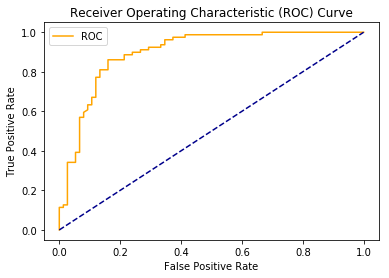

In [166]:
plot_roc_curve(fpr, tpr)